In [ ]:
import pandas as pd
from model import Model
from LOFO_explainer import LOFO_explainer

mod = Model("bert-base-uncased")  # Planuje dodać kilka modeli
sentence = "The bass player caught a large bass, while playing the bass notes."
tokens = mod.tokenize(sentence)
embeddings = mod.get_embeddings(sentence)
explainer = LOFO_explainer(mod)
results = explainer.explainEmbeddings(sentence)


In [ ]:
mod.tokenize(sentence)


['the',
 'bass',
 'player',
 'caught',
 'a',
 'large',
 'bass',
 ',',
 'while',
 'playing',
 'the',
 'bass',
 'notes',
 '.']

### Na szybko wizualizacja z chatuGPT

chociaż nawet tego nie potrafi zrobić...

do pracy zrobię ładniejszą


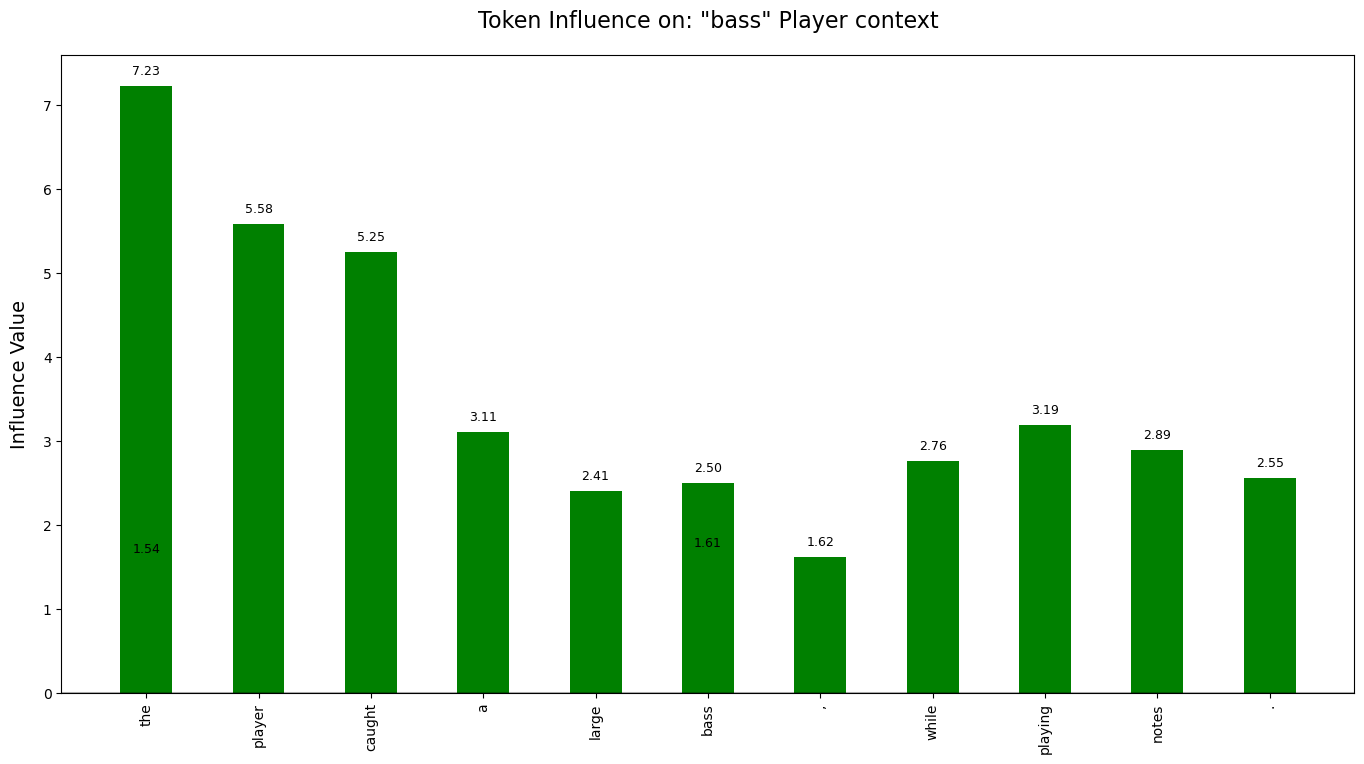

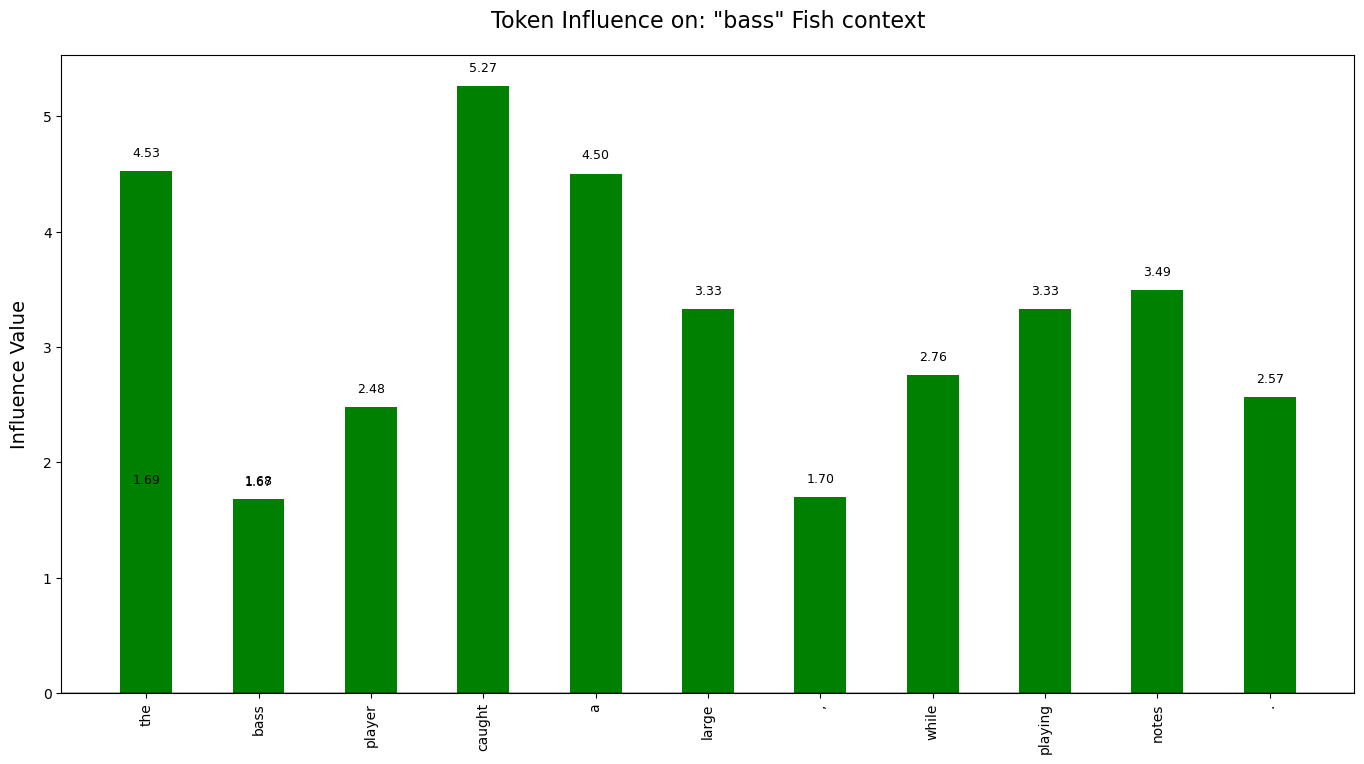

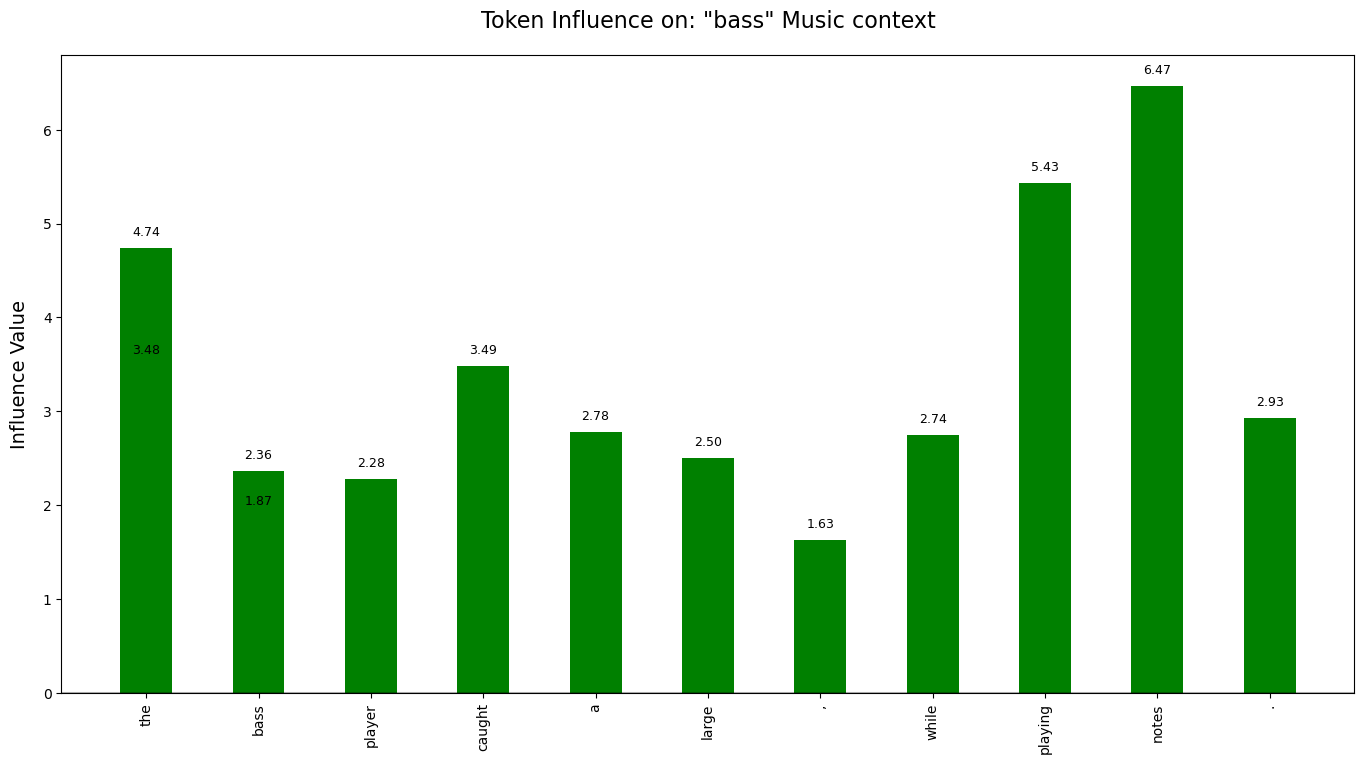

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def plot_shapley_values(results, word, tokens, **kwargs):

    title = kwargs.get("title", "")

    # Create bar plot
    plt.figure(figsize=(14, 8))  # Even larger figure for better spacing

    # Get the shapley values for the token
    bank_result = results[word][1]
    shapley_values = bank_result["shapley_values"]

    # Skip plotting the token itself (which has zero value)
    plot_indices = [i for i in range(len(tokens)) if i != word]
    filtered_tokens = [tokens[i] for i in plot_indices]
    filtered_values = [shapley_values[i] for i in plot_indices]

    # Calculate better bar width based on filtered token count
    width = min(0.7, 6 / len(filtered_tokens))

    # Plot with token names on x-axis and Shapley values on y-axis
    bars = plt.bar(
        filtered_tokens,
        filtered_values,
        color=["red" if v < 0 else "green" for v in filtered_values],
        width=width,
    )

    plt.axhline(y=0, color="black", linestyle="-", alpha=0.3)
    token = tokens[word]
    plt.title(f'Token Influence on: "{token}"{title}', fontsize=16, pad=20)
    plt.ylabel("Influence Value", fontsize=14, labelpad=10)

    # Improve x-axis labels
    plt.xticks(rotation=90, ha="center", fontsize=10)
    plt.gcf().subplots_adjust(bottom=0.25)  # More space for labels

    # Add values annotation with better positioning
    for bar, val in zip(bars, filtered_values):
        y_pos = -0.5 if val < 0 else 0.1  # More space for negative values
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            val + y_pos,
            f"{val:.2f}",
            ha="center",
            va="bottom" if val > 0 else "top",
            fontsize=9,
        )

    plt.tight_layout(pad=2.0)  # Additional padding
    plt.show()


plot_shapley_values(results, 1, tokens, title=" Player context")
plot_shapley_values(results, 6, tokens, title=" Fish context")
plot_shapley_values(results, 11, tokens, title=" Music context")


Token the: 0/14


Computing SHAP values:   0%|          | 0/100 [00:00<?, ?it/s]

Computing SHAP values: 100%|██████████| 100/100 [00:25<00:00,  3.92it/s]


Token bass: 1/14


Computing SHAP values: 100%|██████████| 100/100 [00:25<00:00,  3.97it/s]


Token player: 2/14


Computing SHAP values: 100%|██████████| 100/100 [00:25<00:00,  3.86it/s]


Token caught: 3/14


Computing SHAP values: 100%|██████████| 100/100 [00:26<00:00,  3.78it/s]


Token a: 4/14


Computing SHAP values: 100%|██████████| 100/100 [00:23<00:00,  4.18it/s]


Token large: 5/14


Computing SHAP values: 100%|██████████| 100/100 [00:23<00:00,  4.20it/s]


Token bass: 6/14


Computing SHAP values: 100%|██████████| 100/100 [00:31<00:00,  3.14it/s]


Token ,: 7/14


Computing SHAP values: 100%|██████████| 100/100 [00:36<00:00,  2.75it/s]


Token while: 8/14


Computing SHAP values: 100%|██████████| 100/100 [00:29<00:00,  3.39it/s]


Token playing: 9/14


Computing SHAP values: 100%|██████████| 100/100 [00:41<00:00,  2.40it/s]


Token the: 10/14


Computing SHAP values: 100%|██████████| 100/100 [00:57<00:00,  1.74it/s]


Token bass: 11/14


Computing SHAP values: 100%|██████████| 100/100 [00:41<00:00,  2.39it/s]


Token notes: 12/14


Computing SHAP values: 100%|██████████| 100/100 [00:51<00:00,  1.95it/s]


Token .: 13/14


Computing SHAP values: 100%|██████████| 100/100 [00:43<00:00,  2.28it/s]
/tmp/ipykernel_160308/3741699324.py:53: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(pad=2.0)  # Additional padding


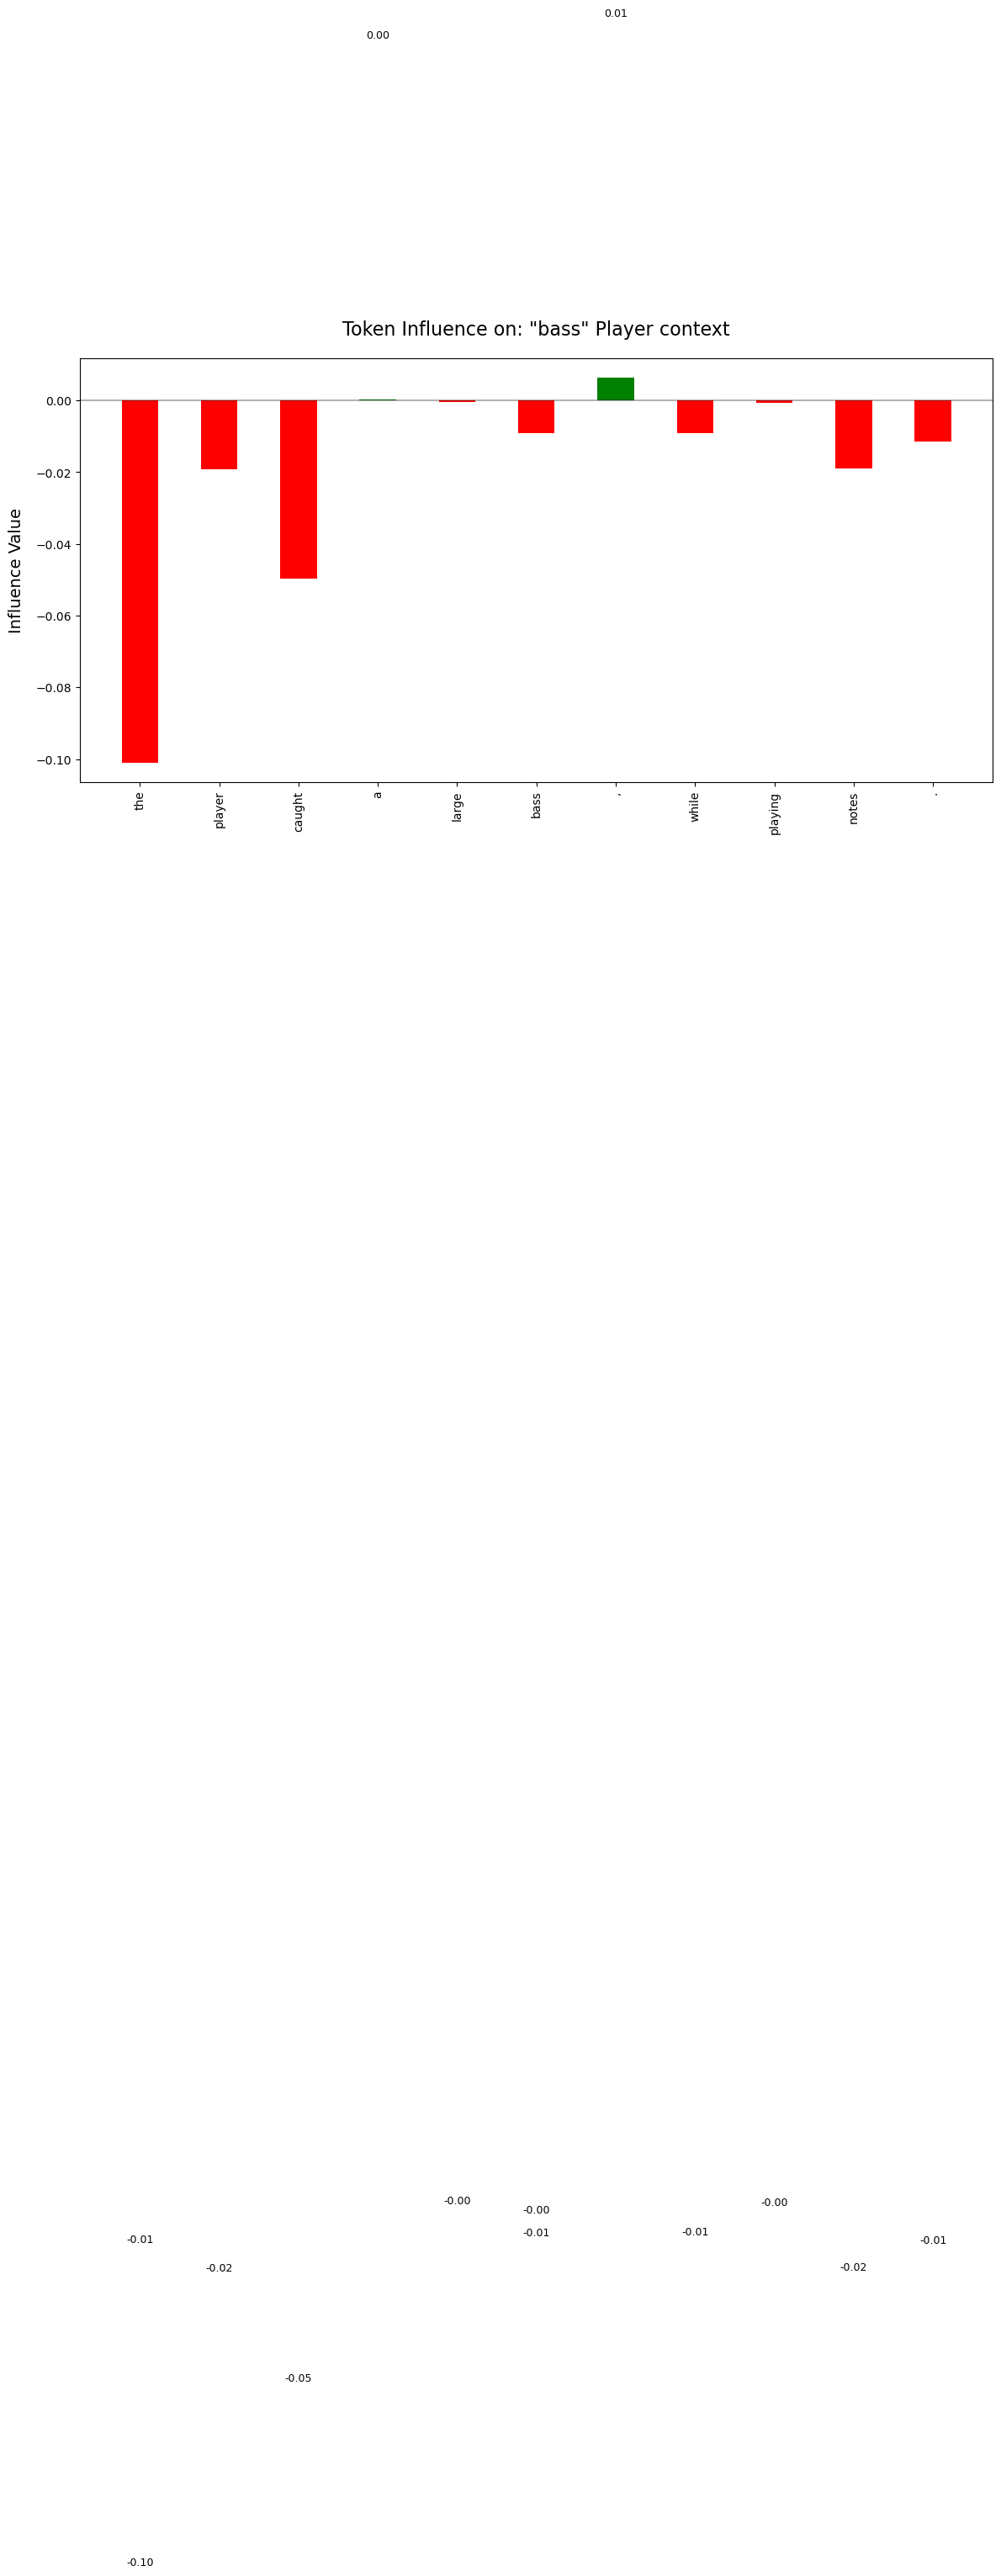

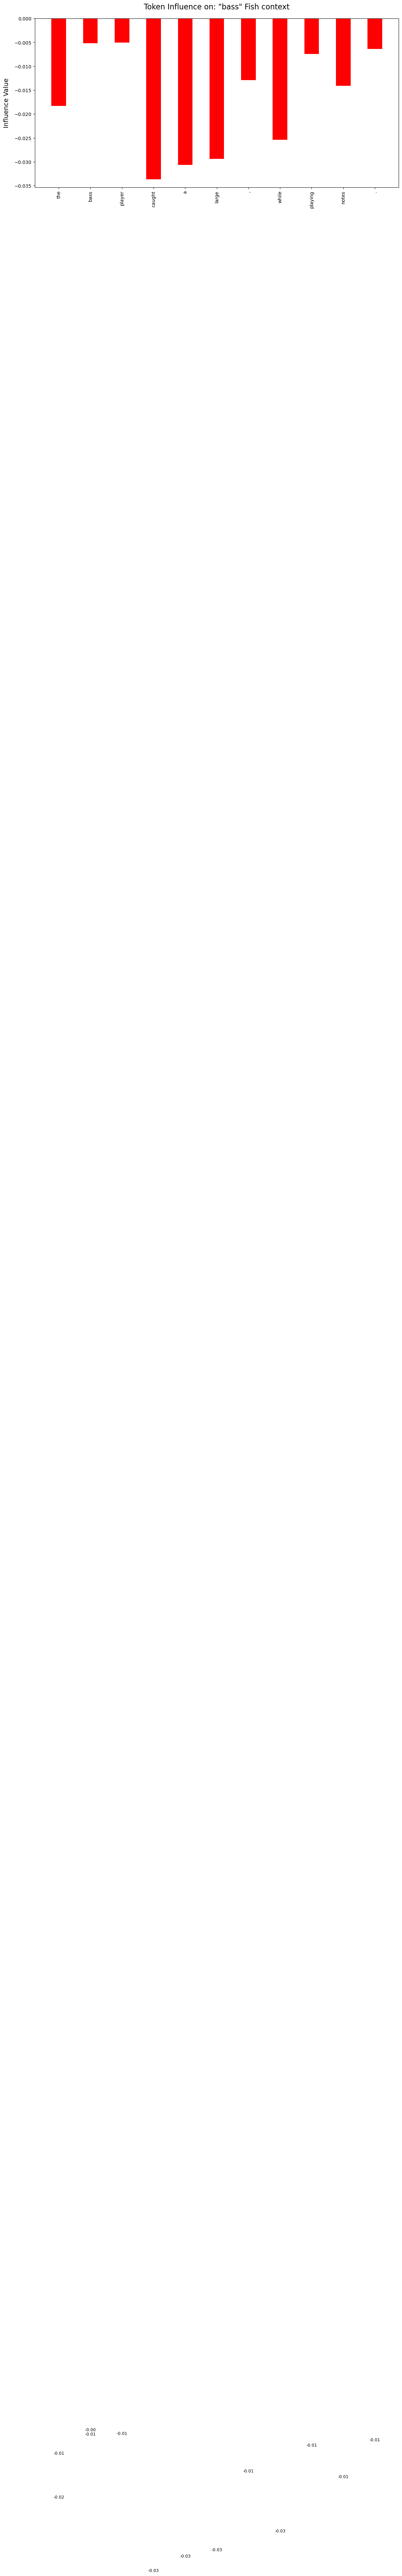

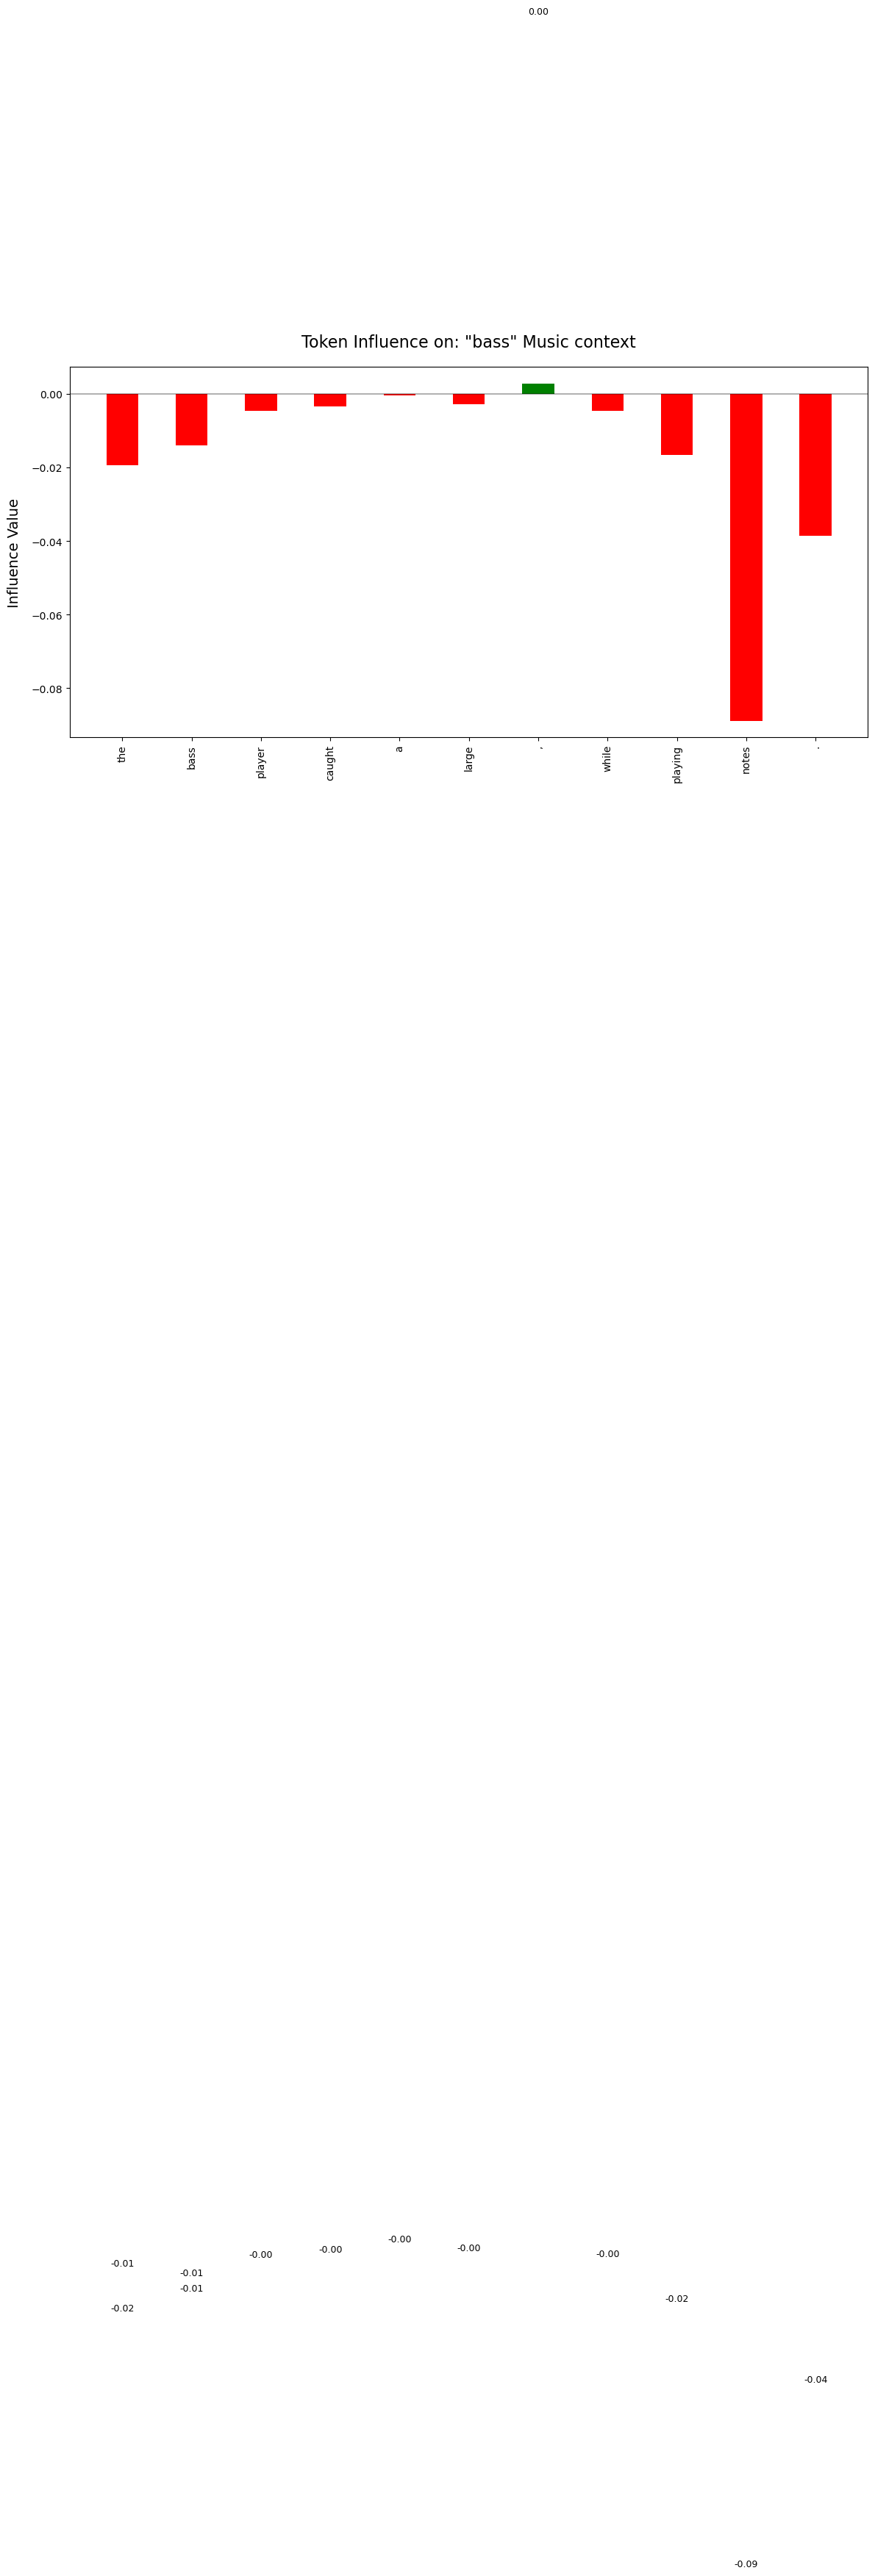

In [ ]:
from SHAP_explainer import SHAP_explainer
from distances import cosine_distance

shap_explainer = SHAP_explainer(mod, distance=cosine_distance)
shap_results = shap_explainer.explainEmbeddings(sentence, max_subsets=100)


In [ ]:
shap_results


{0: ['the',
  {'shapley_values': [0.0,
    -0.022829777300357817,
    -0.04388115793466568,
    -0.06011692851781845,
    -0.013435088694095612,
    -0.010659708976745605,
    -0.026884354650974274,
    -0.000851399302482605,
    -0.01074226677417755,
    -0.027917668521404267,
    0.00253227174282074,
    -0.01701078027486801,
    -0.009915816485881806,
    -0.008981415033340455],
   'explained_token': 'the'}],
 1: ['bass',
  {'shapley_values': [-0.10105098485946655,
    0.0,
    -0.019154242873191833,
    -0.04981013178825378,
    0.0001694139838218689,
    -0.0004262375831604004,
    -0.009136030673980713,
    0.006353181898593903,
    -0.009091245830059052,
    -0.0007175031304359436,
    -0.01110927402973175,
    -0.0029966366291046143,
    -0.018934341967105865,
    -0.01140618771314621],
   'explained_token': 'bass'}],
 2: ['player',
  {'shapley_values': [-0.06702639728784561,
    -0.07990816533565522,
    0.0,
    -0.03365427076816559,
    -0.009098113477230073,
    -0.01115098

/opt/anaconda/envs/clean_magisterka/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


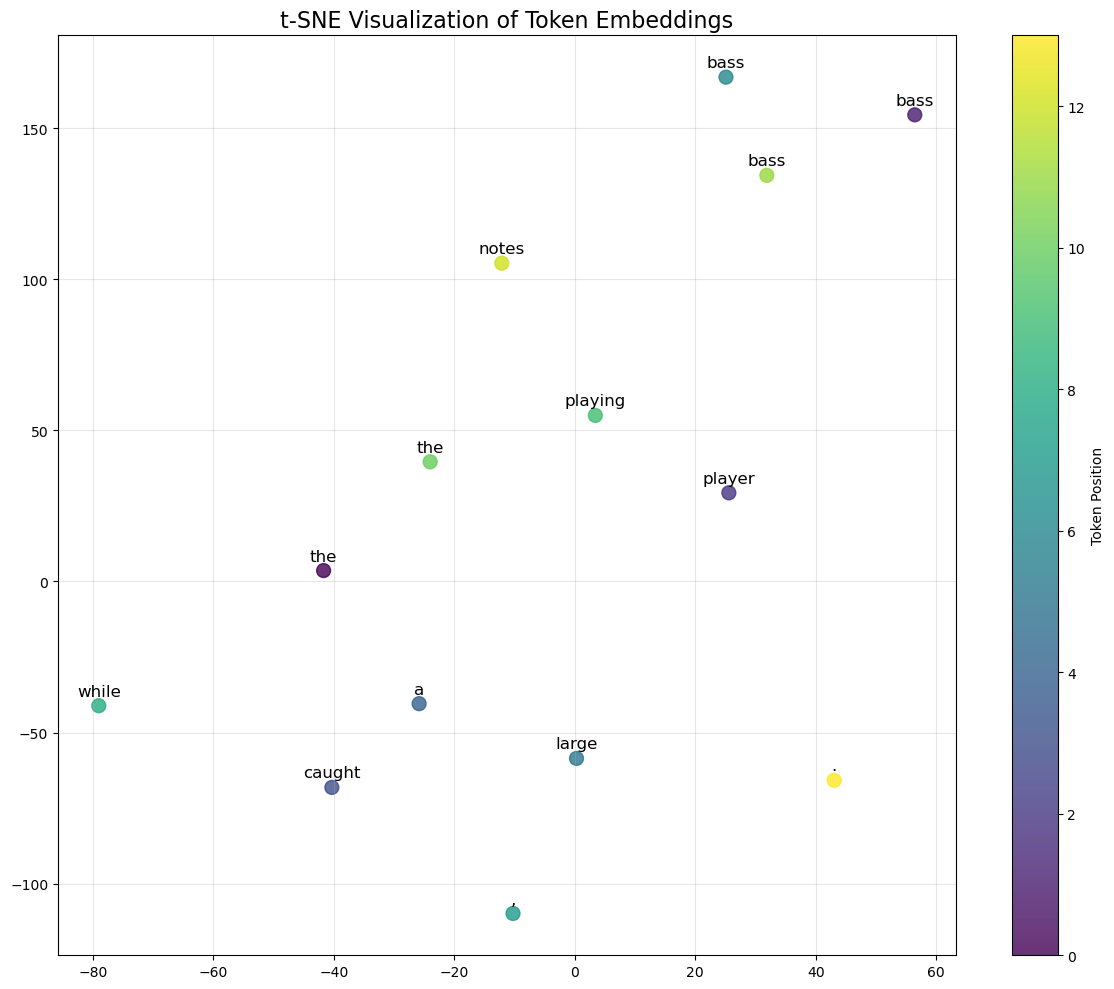

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Extract embeddings (assuming they're numpy arrays or can be converted)
embedding_arrays = [np.array(emb) for emb in embeddings]
embedding_matrix = np.vstack(embedding_arrays)

# Apply t-SNE to reduce to 2D
tsne = TSNE(n_components=2, perplexity=5, random_state=42, n_iter=1000)
reduced_embeddings = tsne.fit_transform(embedding_matrix)

# Create plot
plt.figure(figsize=(12, 10))
scatter = plt.scatter(
    reduced_embeddings[:, 0],
    reduced_embeddings[:, 1],
    c=np.arange(len(tokens)),  # Color by position
    cmap="viridis",
    alpha=0.8,
    s=100,
)

# Add labels for each point
for i, token in enumerate(tokens):
    plt.annotate(
        token,
        (reduced_embeddings[i, 0], reduced_embeddings[i, 1]),
        fontsize=12,
        ha="center",
        va="bottom",
        xytext=(0, 5),
        textcoords="offset points",
    )

# Add legend with token positions
plt.colorbar(scatter, label="Token Position")
plt.title("t-SNE Visualization of Token Embeddings", fontsize=16)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
